**Project Objective:** To perform an in-depth exploratory data analysis of the Netflix Content dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install pandas

In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 18.02 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.


In [ ]:
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data Cleaning

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [ ]:
#filling with unknown
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [ ]:
#adding MODE in empty country column
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country'].value_counts()

,count
country,
United States,3062
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


In [ ]:
#dropping columns w missing date_added and rating
df.dropna(subset=['date_added','rating'], inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


all missing values are taken care of!

In [ ]:
#correcting date format
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)
df['date_added'] = pd.to_datetime(df['date_added'], format='%Y-%m-%d')
df.date_added.head()

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01


# 1. How has the distribution of content ratings changed over time?

In [ ]:
#creating 'year_added' feature
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.year_added.head()

,year_added
0,2020
1,2016
2,2018
3,2017
4,2020


In [ ]:
df.rating.value_counts()

,count
rating,
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


<Figure size 1200x800 with 0 Axes>

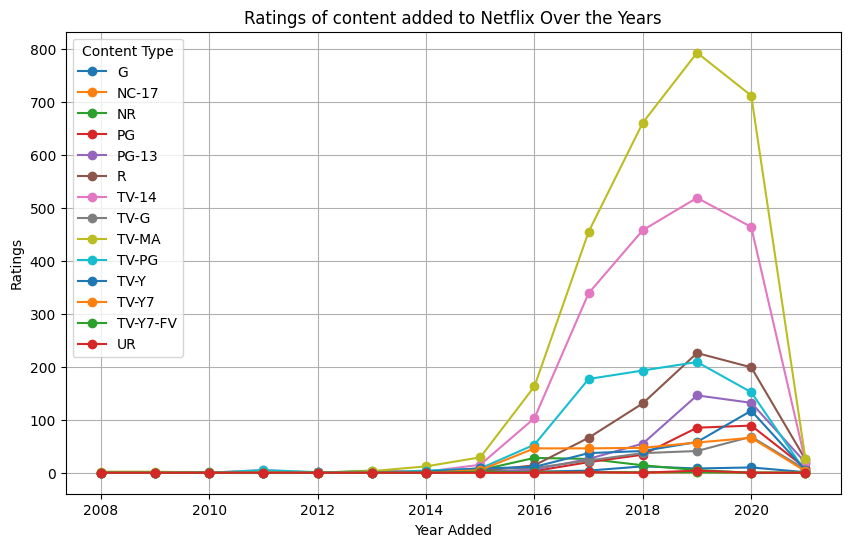

In [ ]:

rating_over_year = df.groupby(['year_added','rating']).size().unstack().fillna(0)

plt.figure(figsize=(12,8))
rating_over_year.plot(kind='line', marker = 'o', figsize=(10,6))
plt.title('Ratings of content added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Ratings')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

# Insights
Since 2016, Netflix started putting more TV-MA(Mauture Adult) content.

**max in 2019**

It also added TV-14(content that may not be suitable for children under 14) content and parental ccontrol.


# 2. Is there a relationship between content age and its type (Movie vs. TV Show)?

In [ ]:
# Creating 'age_on_netflix' feature
df['age'] = df['year_added'] - df['release_year']
content_age = df[df['age'] >= 0]
df.age.head()

,age
0,0
1,0
2,7
3,8
4,12


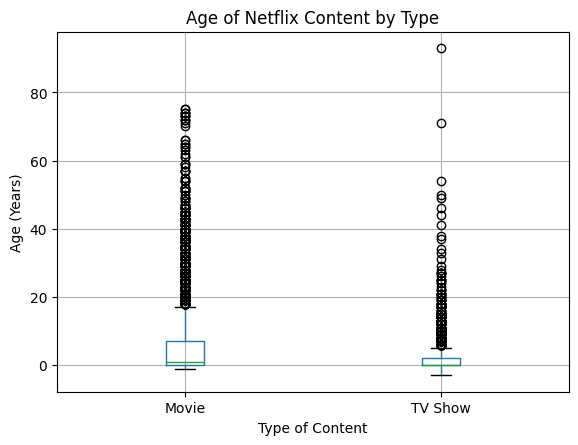

In [ ]:
df.boxplot(column="age", by="type")

plt.title("Age of Netflix Content by Type")
plt.suptitle("")
plt.xlabel("Type of Content")
plt.ylabel("Age (Years)")
plt.show()




# Insights
some TV Shows are v old (classics), others are compartively new (5-20 years old)

Movies on Netflix are between ages 20-80, thus it has less original movies that it has RECENT tv shows.

Also Netflix has old classic movies but more recent hits from the past 2 decades.

The box plot shows that Netflix movies are generally older and more widely distributed in age than TV shows, which tend to be newer with less variability.

# 3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

In [ ]:
df.release_year.min()

1925

In [ ]:
df.year_added.min()

2008

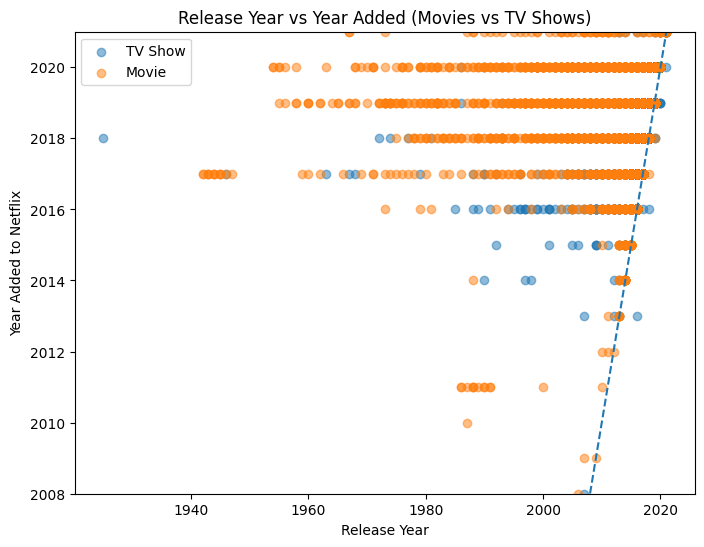

In [ ]:
#min points are 1925 and 2008
colors = {"Movie": "blue", "TV Show": "orange"}

plt.figure(figsize=(8, 6))
for t in df["type"].unique():
    subset = df[df["type"] == t]
    plt.scatter(subset["release_year"], subset["year_added"],
                label=t, alpha=0.5)

min_year = min(df["release_year"].min(), 2008)
max_year = max(df["year_added"].max(), df["release_year"].max())
plt.plot([min_year, max_year], [min_year, max_year], linestyle="--")
plt.xlabel("Release Year")
plt.ylabel("Year Added to Netflix")
plt.title("Release Year vs Year Added (Movies vs TV Shows)")
plt.legend()
plt.ylim(2008, max_year)
plt.show()

#Insights

1. Strong clustering near the diagonal (y = x)
Many points lie close to the dashed diagonal line.
This means a large portion of content is added to Netflix in the same year or shortly after release.

Insight: **Strong presence of Netflix Originals and faster acquisition of new content.**



2. For older release years (left side of graph), points are far below the diagonal.
This means older movies/TV shows were added many years after release.

 Insight: **In earlier years, Netflix focused on licensing older catalog content.**



3. As release years approach 2015–2020, the vertical gap between release year and added year shrinks.
This shows Netflix is increasingly adding content closer to its release date.

Trend: **Shift toward timely, original-first content strategy.**


---


***The plot shows that Netflix increasingly adds newer content with reduced delays between release and platform availability, particularly for TV shows, indicating a shift toward original and timely content production.***

---



#4.  What are the most common word pairs or phrases in content descriptions?

In [ ]:
text = ' '.join(df['description'])

In [ ]:
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

In [ ]:
descriptions = df["description"].dropna()

# Bigram vectorizer
vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2, 2),   # bigrams
    min_df=5              # appears in at least 5 descriptions
)

X = vectorizer.fit_transform(descriptions)

# Sum frequencies
word_counts = X.sum(axis=0)
words_freq = zip(vectorizer.get_feature_names_out(), word_counts.A1)

# Sort and display top 10
top_bigrams = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]

top_bigrams

[('high school', np.int64(133)),
 ('year old', np.int64(130)),
 ('young man', np.int64(103)),
 ('young woman', np.int64(98)),
 ('new york', np.int64(86)),
 ('small town', np.int64(59)),
 ('best friend', np.int64(51)),
 ('true story', np.int64(48)),
 ('stand special', np.int64(47)),
 ('world war', np.int64(46))]

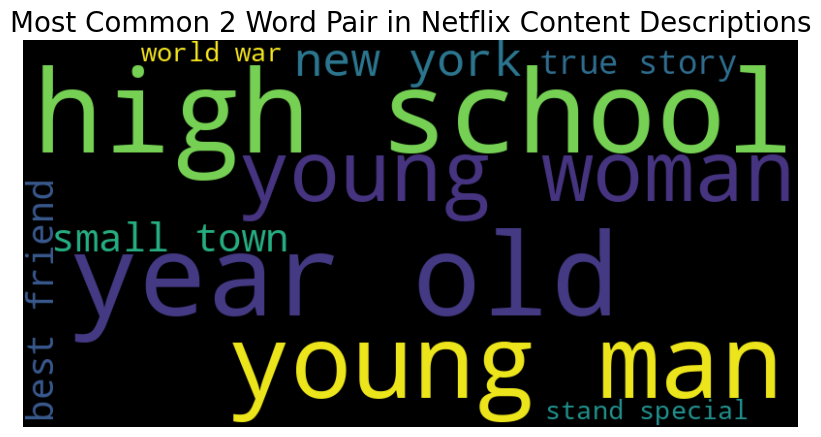

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert list of tuples (bigram, frequency) to a dictionary
bigram_freq_dict = {bigram: freq for bigram, freq in top_bigrams}

# Create a WordCloud object
wordcloud_image = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(bigram_freq_dict)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common 2 Word Pair in Netflix Content Descriptions', fontsize=20)
plt.show()

# 5. Who are the top directors on Netflix?

In [ ]:
df.director.head(40)

,director
0,Unknown
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
5,Serdar Akar
6,Yasir Al Yasiri
7,Kevin Reynolds
8,Shravan Kumar
9,Vikram Bhatt


ds has some multiple directors as well

In [ ]:
df["director"].str.split(", ").explode().value_counts().drop("Unknown").head(5)

,count
director,
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
